In [63]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Load data

In [49]:
dir = os.path.join(os.getcwd(), "dataset", "Prediction")
y_true = pd.read_csv(os.path.join(dir, "y_true.csv"), header=0).to_numpy().squeeze()
simple_lstm = pd.read_csv(os.path.join(dir, "simple LSTM.csv"), header=0).to_numpy().squeeze()
lstm = pd.read_csv(os.path.join(dir, "LSTM.csv"), header=0).to_numpy().squeeze()
lin_reg = pd.read_csv(os.path.join(dir, "lin_reg.csv"), header=0).to_numpy().squeeze()
svm = pd.read_csv(os.path.join(dir, "svm.csv"), header=0).to_numpy().squeeze()
random_forest = pd.read_csv(os.path.join(dir, "random_forest.csv"), header=0).to_numpy().squeeze()

## Calculate RMSE

In [50]:
from sklearn.metrics import mean_squared_error as mse

In [51]:
days = [1, 3, 7, 14, 30]
models = ['simple_LSTM', 'LSTM', 'Linear Regression', 'SVM', 'Random Forest']

In [52]:
rmse_result = pd.DataFrame(index=days, columns=models)
for day in days:
    rmse_result.loc[day,models[0]] = mse(y_true[:day], simple_lstm[:day], squared=False)
    rmse_result.loc[day,models[1]] = mse(y_true[:day], lstm[:day], squared=False)
    rmse_result.loc[day,models[2]] = mse(y_true[:day], lin_reg[:day], squared=False)
    rmse_result.loc[day,models[3]] = mse(y_true[:day], svm[:day], squared=False)
    rmse_result.loc[day,models[4]] = mse(y_true[:day], random_forest[:day], squared=False)

In [53]:
rmse_result

,simple_LSTM,LSTM,Linear Regression,SVM,Random Forest
1,0.002533,0.011139,0.034592,0.049445,0.028812
3,0.037965,0.034515,0.032293,0.035216,0.020716
7,0.041708,0.041026,0.043362,0.049269,0.045548
14,0.036734,0.036917,0.038422,0.044073,0.039654
30,0.045853,0.042233,0.03719,0.040589,0.047069


In [54]:
sorted_columns = rmse_result.apply(lambda row: sorted(row.index, key=lambda col: row[col]), axis=1)
print(sorted_columns)

1     [simple_LSTM, LSTM, Random Forest, Linear Regr...
3     [Random Forest, Linear Regression, LSTM, SVM, ...
7     [LSTM, simple_LSTM, Linear Regression, Random ...
14    [simple_LSTM, LSTM, Linear Regression, Random ...
30    [Linear Regression, SVM, LSTM, simple_LSTM, Ra...
dtype: object


## Plot the result

In [64]:
colors = sns.color_palette('husl', len(models))

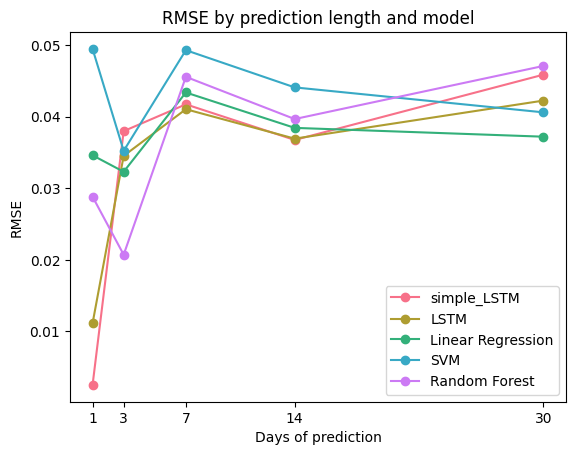

In [68]:
rmse_result.plot(marker='o', linestyle='-', color=colors)
plt.xticks(ticks=days, labels=days)
plt.xlabel('Days of prediction')
plt.ylabel('RMSE')
plt.title('RMSE by prediction length and model')
plt.legend()
plt.show()

C:\Users\owNer\AppData\Local\Temp\ipykernel_26140\1320980317.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, average_column[i], round(average_column[i],4), ha = 'center')


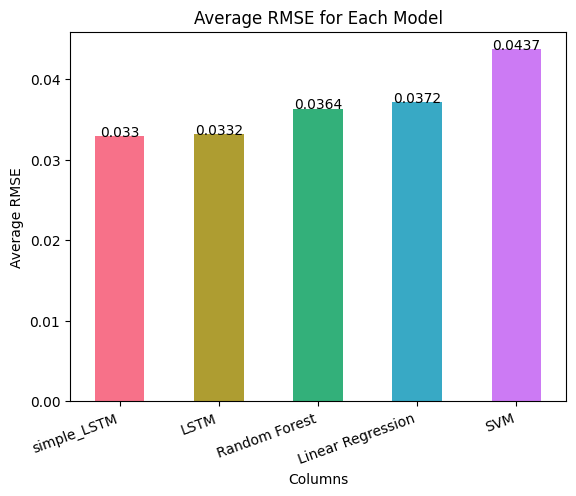

In [84]:
average_column = rmse_result.mean().sort_values()

average_column.plot(kind='bar', color=colors)
plt.xlabel('Columns')
plt.ylabel('Average RMSE')
plt.title('Average RMSE for Each Model')

plt.xticks(rotation=20, ha='right')
for i in range(len(days)):
        plt.text(i, average_column[i], round(average_column[i],4), ha = 'center')

plt.show()